In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
final_df = pd.read_csv('energy_weather_price.csv')
final_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0


In [3]:
final_df['time'] = pd.to_datetime(final_df['time'], utc = True, infer_datetime_format = True)

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

In [5]:
final_df = final_df.set_index('time')
final_df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0


### Generating Features

As we discussed before, the typical business hours in Spain are from 9-5. They usually have a gap or a break in between for a 'Siesta'. This can imply reduced power consumption during those hours for businesses and hence possibly the electricity prices too.
Typical work day in Spain is as follows : 

- 9:30 - 1:30 and 4:30 - 8:30 : Business hours
- 1:30 - 4:30 : Siesta

Hence we classify each hour as a business hour or non business hour. 
In order to do that, we first extract the hour information from each time index entry. 

In [6]:
for i in range(len(final_df)):
    hour_index = final_df.index[i]
    hour = hour_index.hour
    if (hour > 8 and hour < 14) or (hour > 16 and hour < 21):
        final_df.loc[hour_index, 'business hour'] = 1
    else:
        final_df.loc[hour_index, 'business hour'] = 0

## Preprocessing and Modeling

Here on we start with the preprocessing and modeling. 
We start with a simple ARIMA model and then move on to a more complex model in the subsequent analysis

Since the time series is stationary, we start simple by evaluating the time series of the price alone using an ARIMA model and evaluating it against different parameters of p, q and d. For simplicity, we take only the hourly values for the year 2018 and run an ARIMA model on that year.

In [7]:
# Creating train and test data sets and evaluating ARIMA models

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [8]:
# create a function that evaluates ARIMA models of a specfic order

def evaluate_arima_model(data, arima_order):
    split = int(len(data) * 0.8)
    
    # making train and test variables
    train = data[0:split]
    test = data[split:len(data)]
    
    past = [x for x in train]
    predictions = list()
    
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model.
        model = ARIMA(past, arima_order)
        model_fit = model.fit(disp = 0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        
        past.append(test[i])
        
    
    # calculate the mean square error for the test data vs the forecasted data
    error = mean_squared_error(test, predictions)
    return error

#--------creating a function that evaluates different ARIMA models of different orders - This function calls
# the above function as a step for each value of p, d, q

def evaluate_models(dataset, p_values):
    best_score, best_cfg = float("inf"), None
    
    # Iterate through p
    for p in p_values:
        
        order = (p, 0, 0)
                
        try:
            mse = evaluate_arima_model(dataset, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print('ARIMA order = {}, MSE = {}'.format(best_cfg, best_score))
        except:
            continue
    return print(f'Best ARIMA model : {best_cfg}, {best_score}')
            
        
        
    

In [9]:
for k in range(len(final_df)):
    hour_index = final_df.index[k]
    year = hour_index.year
    final_df.loc[hour_index, 'year'] = year

In [10]:
price_2018 = final_df[final_df['year'] == 2018]['price actual']

In [11]:
price_2018.shape

(8759,)

In [13]:
# Iterating through p, q and q values:
P_values = [x for x in range(0,3)]

import warnings
warnings.filterwarnings("ignore")
evaluate_models(price_2018, P_values)

ARIMA order = (0, 0, 0), MSE = 81.96267870049418
ARIMA order = (1, 0, 0), MSE = 10.83794415483864
Best ARIMA model : (1, 0, 0), 10.83794415483864


We see that by just analysing the time series alone, an AR model with parameters (2, 0, 0) gives a MSE of 7.10. 
Lets use this model to forecast the prices. We fit the model on the prices for the years 2015, through 2017 and use that to predict the prices for 2018

In [14]:
#print(final_df.year.unique())
prices = final_df[~(final_df['year'] == 2018)]['price actual']
prices.index.year.unique()

Int64Index([2014, 2015, 2016, 2017], dtype='int64', name='time')

In [15]:
p = 2
d = 0
q = 0

model = ARIMA(prices, order = (p, d, q))
model_fit = model.fit()
forecast = model_fit.forecast(48 * 365)

In [16]:
# taking a look at the summary data
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           price actual   No. Observations:                26305
Model:                     ARMA(2, 0)   Log Likelihood              -67725.612
Method:                       css-mle   S.D. of innovations              3.176
Date:                Tue, 15 Mar 2022   AIC                         135459.224
Time:                        08:11:30   BIC                         135491.934
Sample:                    12-31-2014   HQIC                        135469.786
                         - 12-31-2017                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 56.0236      0.374    149.890      0.000      55.291      56.756
ar.L1.price actual     1.4714      0.005    280.168      0.000       1.461       1.482
ar.L2.price actual    -0.5238      0.005    -99.727      0.000      -0.534      -0.514
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1522           +0.0000j            1.1522            0.0000
AR.2            1.6568           +0.0000j            1.6568            0.0000
-----------------------------------------------------------------------------
"""

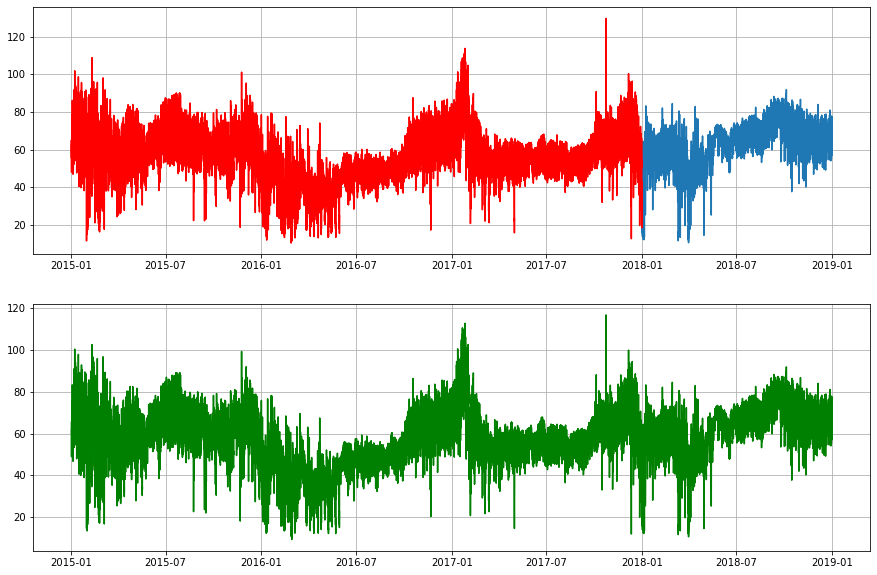

In [17]:
# Visualizing the results
from pandas import datetime
plt.figure(figsize = (15, 10))
plt.subplot(2, 1,1)
plt.plot(price_2018)
plt.grid()
start_ind = datetime(2018, 1, 1)
end_ind = datetime(2018,12,1)
plt.plot(model_fit.predict(), color = 'red')

plt.subplot(2, 1, 2)
plt.plot(final_df['price actual'], color = 'green')

plt.grid()
plt.show()



We can see that the price prediction model closely matches the actual price. Next lets see what prices can we predict in the future

## Forecasting future price

In [18]:
# forecasting hourly prices for the next one year - 
forecast_period = 48 * 365

date_range = pd.date_range(prices.index[-1], periods = forecast_period, 
                          freq = 'H').tolist()

future_hours = pd.DataFrame(date_range, columns = ['hour'])

future_hours['hour'] = pd.to_datetime(future_hours['hour'])

future_hours.set_index(['hour'], inplace = True)

future_hours['hourly predictions'] = forecast[0]

future_hours.head()

,hourly predictions
hour,
2017-12-31 23:00:00+00:00,20.935978
2018-01-01 00:00:00+00:00,22.865906
2018-01-01 01:00:00+00:00,25.613508
2018-01-01 02:00:00+00:00,28.645515
2018-01-01 03:00:00+00:00,31.667695


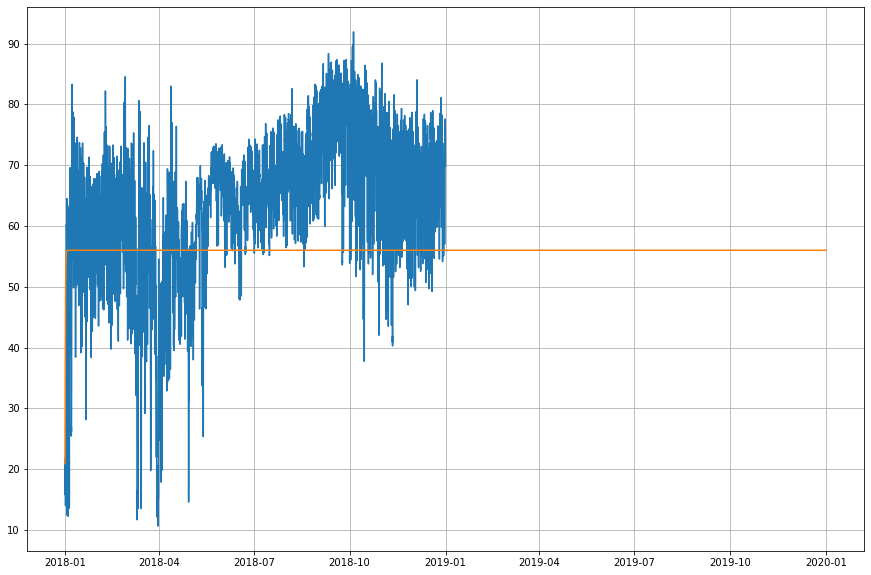

In [19]:
# plotting figure

plt.figure(figsize = (15, 10))
plt.plot(price_2018)
plt.plot(future_hours['hourly predictions'])
plt.grid()
plt.show()

In the above cells we fit our model on price data from 2015- 2017 and forecasted the prices for the year 2018 and 2019. We then compared this to the actual price of electricity for they year 2018. We see that the line goes through most of the data points and continues to extend for the year 2019. 

Next we will consider a machine learning approach to predict the price in an attempt to better fit the data.

## Time Series Forecasting using ML models


### Data Pre processing

In this section we focus on performing time series forecasting using ML methods. While in the ARIMA model, we only used the time series alone to predict the future price, for the ML models we use the other features as part of our analysis as well. However which features to use, we base it off of the PCA analysis. 

In [27]:
# Normalizing the data
X = final_df[final_df.columns.drop('price actual')].values

y = final_df['price actual'].values



In [28]:
""" The reshaping is done so it can be in a form that is ready for applying the normalizing techniques. Typically
there has to be atleast one column, and the number of rows have to be the same as the X data."""
y = y.reshape(-1, 1)
y.shape


(35064, 1)

In [29]:
y

array([[65.41],
       [64.92],
       [64.48],
       ...,
       [74.3 ],
       [69.89],
       [69.88]])

In [30]:
# importing modules for scaling and preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

scale_X = MinMaxScaler(feature_range = (0, 1))
scale_Y = MinMaxScaler(feature_range = (0, 1))

# creating an index to split data set into train and test. 
# Train dataset size = 70% of original dataset
train_split_index = int(0.7 * len(final_df)) 

# fit the scaler only on the training data
scale_X.fit(X[:train_split_index])
scale_Y.fit(y[:train_split_index])
    

MinMaxScaler()

In [31]:
# transform the whole data set using the scaler 
X_norm = scale_X.transform(X)
y_norm = scale_Y.transform(y)

In [32]:
# initializing a PCA object
pca = PCA()
# perform PCA only on training data to see what what features of the training data are most important
X_pca = pca.fit(X_norm[:train_split_index])

In [33]:
pca.explained_variance_ratio_

array([1.98574061e-01, 9.54844174e-02, 8.97033230e-02, 6.43776388e-02,
       5.62263509e-02, 4.82115569e-02, 4.00792297e-02, 3.77584717e-02,
       3.31809471e-02, 2.91602845e-02, 2.80346640e-02, 2.55513809e-02,
       2.27123456e-02, 2.02758701e-02, 1.98529153e-02, 1.92567552e-02,
       1.61180418e-02, 1.46937154e-02, 1.35327674e-02, 1.11491197e-02,
       9.84279842e-03, 8.72848854e-03, 7.93402858e-03, 7.66714061e-03,
       7.35193224e-03, 6.08008934e-03, 5.16507665e-03, 5.03721262e-03,
       4.85139932e-03, 4.60019929e-03, 4.24731791e-03, 4.17065739e-03,
       3.86334894e-03, 3.64500787e-03, 3.21976108e-03, 2.88736634e-03,
       2.72700769e-03, 2.28709866e-03, 2.20724962e-03, 1.96597558e-03,
       1.75199788e-03, 1.66556048e-03, 1.61375228e-03, 1.48654500e-03,
       1.45950886e-03, 1.26274218e-03, 1.13538160e-03, 1.06405581e-03,
       1.00060288e-03, 9.82958576e-04, 8.33792579e-04, 6.43907916e-04,
       5.94624953e-04, 5.08914771e-04, 4.55320495e-04, 3.23752829e-04,
      

The explained variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 or 80% to avoid overfitting.

reference - https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6


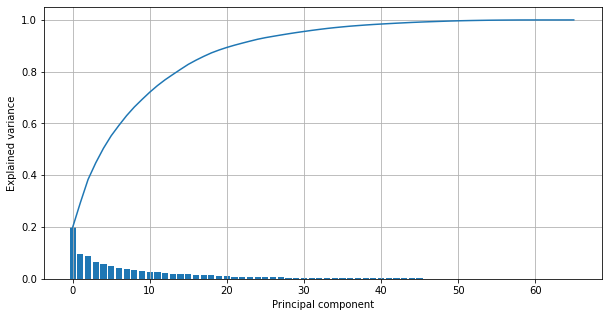

In [34]:
components = len(pca.explained_variance_ratio_)

plt.figure(figsize = (10, 5))

# plotting the variance or each feature
plt.bar( np.arange(components), pca.explained_variance_ratio_)

# plotting the cumulative explained variance ratio as a fucntion of each feature
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Setting labels
plt.xlabel('Principal component')
plt.ylabel('Explained variance')

plt.grid()
plt.show()

We now apply PCA such that we only keep features that help us account for 80% of the variance

In [35]:
pca = PCA(n_components = 0.8)
pca.fit(X_norm[:train_split_index])
X_pca = pca.transform(X_norm)

In [36]:
X_pca.shape

(35064, 15)

We see that we need only 15 of the total 66 to account for 80% of the variance. 

Having done a PCA we can now move on to bulding our ML models.

## LSTM - Multivariate

Here we run a LSTM model on the noralized data set. First lets combine the X and Y before we create the train and test split dataset

In [37]:
normal_dataset = np.concatenate((X_pca, y_norm), axis = 1)

In [38]:
def create_dataset(data, time_step = 1):
    dataX = []
    dataY = []
    
    for i in range(len(data) - (time_step + 1)):
        a = data[i: (i + time_step)]
        dataX.append(a)
        dataY.append(data[i + time_step, -1])
        
    return np.array(dataX), np.array(dataY)

In [39]:
normal_dataset.shape

(35064, 16)

In [40]:
train_data = normal_dataset[:train_split_index, :]
test_data = normal_dataset[train_split_index : len(normal_dataset), :]

In [34]:
train_data.shape, test_data.shape

((24544, 16), (10520, 16))

In [35]:
step_size = 1
X_train, y_train = create_dataset(train_data, step_size)
X_test, y_test = create_dataset(test_data,step_size)

In [36]:
X_train.shape, y_train.shape

((24542, 1, 16), (24542,))

In [37]:
X_test.shape, y_test.shape

((10518, 1, 16), (10518,))

Thus we now have a three dimenionsal data set that basically inlcudes the information from the previous time point in the X, and the price value of the current time point in the y.  We are now set up for creating and fitting our LSTM model.


In [1]:
#pip install tensorflow
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [ ]:
# creating the stacked LSTM model

# importing the necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [ ]:
# design the network
model = Sequential()
model.add(LSTM(50, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam')

# fit the network
history = model.fit()

Run these notebooks on Google Colab and Kaggle notebook - Upload the notebook adn data and try running it on those. 